In [1]:
import torch
from matplotlib import pyplot as plt
import numpy as np #Data Transformation/ working with arrays/matrices
import cv2

In [2]:
model=torch.hub.load('ultralytics/yolov5','yolov5n')

Using cache found in C:\Users\kkt/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2024-5-16 Python-3.9.1 torch-2.3.0+cu118 CPU

Fusing layers... 
YOLOv5n summary: 213 layers, 1867405 parameters, 0 gradients, 4.5 GFLOPs
Adding AutoShape... 


In [3]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 16, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(16, 16, kernel_size=(1, 1), stride=(1, 1))
  

Make Detections

In [4]:
img = 'https://www.shutterstock.com/image-photo/sale-consumerism-people-concept-happy-260nw-423421135.jpg'

In [5]:
result=model(img)
result.print()

image 1/1: 280x398 7 persons
Speed: 1083.7ms pre-process, 2582.9ms inference, 175.5ms NMS per image at shape (1, 3, 480, 640)


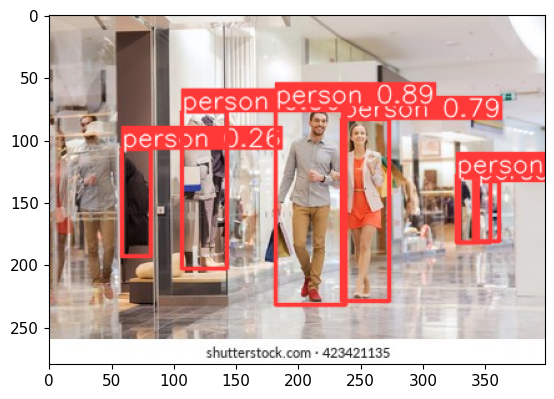

In [6]:
%matplotlib inline
plt.imshow(np.squeeze(result.render()))
plt.show()

In [7]:
np.array(result.render()).shape

(1, 280, 398, 3)

In [8]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()

    object_detction=model(frame)
    cv2.imshow('YOLO',np.squeeze(object_detction.render()))

    if cv2.waitKey(10) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

In [9]:
import uuid #unique identifier
import os
import time

In [10]:
IMAGES_PATH = os.path.join('data','images')
labels=['awake','drowsy']
number_imgs=20

cap = cv2.VideoCapture(0)
for label in labels:
    print('collecting images for {}'.format(labels))
    time.sleep(5)

    #Loop through image ranges
    for img_num in range(number_imgs):
        print('collecting images for {}, image number{}'.format(labels, img_num))

        ret, frame= cap.read()

        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        cv2.imwrite(imgname, frame)
        time.sleep(2)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()

In [11]:
for label in labels:
    print('collecting images for {}'.format(label))
    for img_num in range(number_imgs):
        print('collecting images for {}, image number{}'.format(label, img_num))

collecting images for awake
collecting images for awake, image number0
collecting images for awake, image number1
collecting images for awake, image number2
collecting images for awake, image number3
collecting images for awake, image number4
collecting images for awake, image number5
collecting images for awake, image number6
collecting images for awake, image number7
collecting images for awake, image number8
collecting images for awake, image number9
collecting images for awake, image number10
collecting images for awake, image number11
collecting images for awake, image number12
collecting images for awake, image number13
collecting images for awake, image number14
collecting images for awake, image number15
collecting images for awake, image number16
collecting images for awake, image number17
collecting images for awake, image number18
collecting images for awake, image number19
collecting images for drowsy
collecting images for drowsy, image number0
collecting images for drowsy,

In [12]:
!cd labelImg && pyrcc5 -o libs/resources.py resources.qrc

In [13]:
import os
os.environ["GIT_PYTHON_REFRESH"] ="quiet"
import git

In [14]:
!cd yolov5 && python train.py --img 320 --batch 16 --epochs 5 --data dataset.yaml --weights yolov5n.pt

^C


Load Dataset Image


In [15]:
model= torch.hub.load('ultralytics/yolov5','custom',path='yolov5/runs/train/exp/weights/last.pt',force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\kkt/.cache\torch\hub\master.zip
YOLOv5  2024-5-16 Python-3.9.1 torch-2.3.0+cu118 CPU

Fusing layers... 
Model summary: 157 layers, 1782166 parameters, 0 gradients, 4.2 GFLOPs
Adding AutoShape... 


In [16]:
img = os.path.join('data','images','awake.c533aafe-1300-11ef-a1bd-c8d9d2d6ef77.jpg')

In [17]:
result=model(img)

In [18]:
result.print()

image 1/1: 480x640 (no detections)
Speed: 43.0ms pre-process, 1866.7ms inference, 0.8ms NMS per image at shape (1, 3, 480, 640)


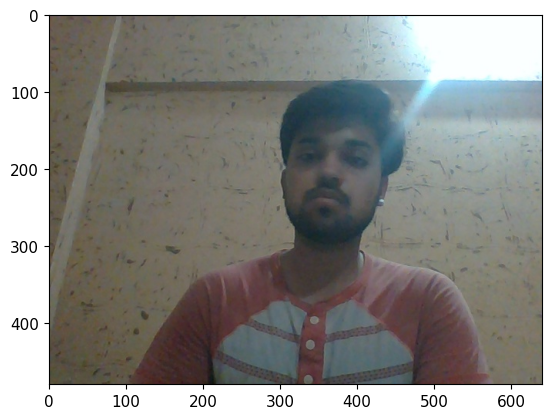

In [19]:
plt.imshow(np.squeeze(result.render()))
plt.show()

In [20]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()

    object_detction=model(frame)
    cv2.imshow('YOLO',np.squeeze(object_detction.render()))

    if cv2.waitKey(10) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()